In [11]:
import os
import random
import time
import pickle

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from selection_sort import selection_sort
from heap_sort import HeapSort
from tournament_sort import TournamentSort
from element import Element

### Settings

In [2]:
ALGORITHMS = {"tournament_sort": TournamentSort, "heap_sort": HeapSort} # "selection_sort": selection_sort
ORDERS = ["ascendent_order", "descendent_order", "shuffled_order"]
NUM_ELEMENTS_LIST = [1000, 10000, 100000, 1000000]
PATH = "resultset/"
stats = {"algorithm":[], "size": [], "order": [], "time": [], "num_comparations": []}

### Utils

In [3]:
def get_order_list(n: int, order_type: str) -> list:
    arr = [Element(i) for i in range(n)]
    if order_type == 'ascendent_order': return arr
    elif order_type == 'descending_order': return arr[::-1]
    random.shuffle(arr)
    return arr

def add_stat(algorithm: str, size: int, order: str, total_time: float, num_op: int) -> None:
    stats["algorithm"].append(algorithm)
    stats["size"].append(size)
    stats["order"].append(order)
    stats["time"].append(total_time)
    stats["num_comparations"].append(num_op)
    
def save_stat(file_name=None):
    if not file_name: file_name = "algorithms_stats"
    file_name = f"{file_name}_{time.time()}.pickle"
    with open(os.path.join(PATH, file_name), "wb") as f:
        pickle.dump(stats, f)
        
def load_stat():
    list_dir = os.listdir(PATH)
    if  list_dir != [] and "pickle" in list_dir[-1]:
        file_name = list_dir[-1]
        print(f"load: {file_name}")
        with open(os.path.join(PATH, file_name), "rb") as f:
            stats = pickle.load(f)
    else:
        stats = {"algorithm":[], "size": [], "order": [], "time": [], "num_operations": []}

### Experiments and Results

In [4]:
load_stat()
for algorithm_name in ALGORITHMS:
    if algorithm_name not in stats["algorithm"]:
        for order in ORDERS:
            for num_elements in NUM_ELEMENTS_LIST:
                arr = get_order_list(num_elements, order)
                tbegin = time.time()
                x = ALGORITHMS[algorithm_name](arr)
                sorted_arr = x.sort()
                tend = time.time()
                num_comp = 0
                for element in sorted_arr:
                    num_comp += element.num_comparations
                add_stat(algorithm_name, num_elements, order, tend - tbegin, num_comp)
                print(f"algorithm_name: {algorithm_name}, num_elements: {num_elements}, order: {order}, time: {tend - tbegin}, num_comp: {num_comp}")

    save_stat()
df = pd.DataFrame(stats)

load: algorithms_stats_1574174709.2427328.pickle
<class 'tournament_sort.TournamentSort'>
algorithm_name: tournament_sort, num_elements: 1000, order: ascendent_order, time: 0.03999662399291992, num_comp: 18999
<class 'tournament_sort.TournamentSort'>
algorithm_name: tournament_sort, num_elements: 10000, order: ascendent_order, time: 0.45397281646728516, num_comp: 269995
<class 'tournament_sort.TournamentSort'>
algorithm_name: tournament_sort, num_elements: 100000, order: ascendent_order, time: 5.007691144943237, num_comp: 3299994
<class 'tournament_sort.TournamentSort'>
algorithm_name: tournament_sort, num_elements: 1000000, order: ascendent_order, time: 55.589648962020874, num_comp: 38999993
<class 'tournament_sort.TournamentSort'>
algorithm_name: tournament_sort, num_elements: 1000, order: descendent_order, time: 0.44797205924987793, num_comp: 18999
<class 'tournament_sort.TournamentSort'>
algorithm_name: tournament_sort, num_elements: 10000, order: descendent_order, time: 0.42097473

In [5]:
load_stat()
df = pd.DataFrame(stats)
df

load: algorithms_stats_1574175369.099999.pickle


,algorithm,size,order,time,num_comparations
0,tournament_sort,1000,ascendent_order,0.039997,18999
1,tournament_sort,10000,ascendent_order,0.453973,269995
2,tournament_sort,100000,ascendent_order,5.007691,3299994
3,tournament_sort,1000000,ascendent_order,55.589649,38999993
4,tournament_sort,1000,descendent_order,0.447972,18999
5,tournament_sort,10000,descendent_order,0.420975,269995
6,tournament_sort,100000,descendent_order,5.148690,3299994
7,tournament_sort,1000000,descendent_order,64.451116,38999993
8,tournament_sort,1000,shuffled_order,0.829949,18999
9,tournament_sort,10000,shuffled_order,0.424974,269995


### Visualization

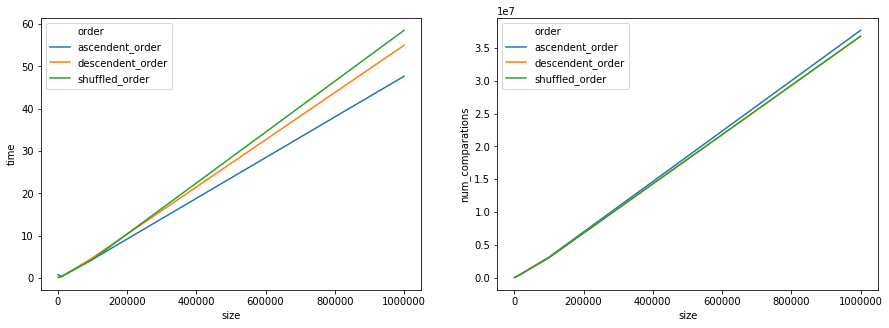

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.lineplot(data=df[df["algorithm"]=="heap_sort"], x="size", y="time", hue="order", ax=ax[0])
sns.lineplot(data=df[df["algorithm"]=="heap_sort"], x="size", y="num_comparations", hue="order", ax=ax[1])
plt.show()

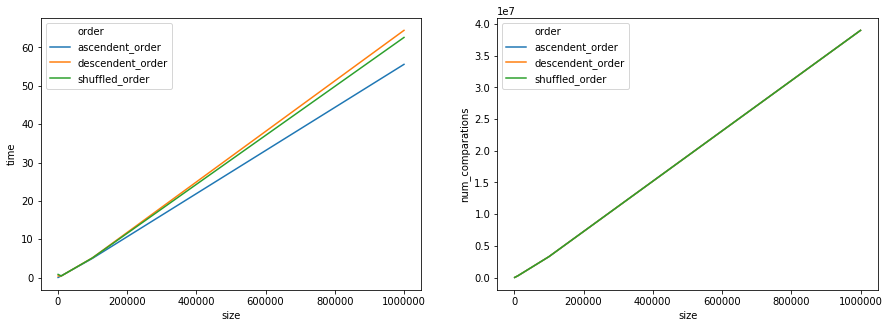

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.lineplot(data=df[df["algorithm"]=="tournament_sort"], x="size", y="time", hue="order", ax=ax[0])
sns.lineplot(data=df[df["algorithm"]=="tournament_sort"], x="size", y="num_comparations", hue="order", ax=ax[1])
plt.show()